In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
mnist=tf.keras.datasets.mnist

In [13]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [14]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [15]:
model=tf.keras.models.Sequential( )
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2664 - accuracy: 0.9223
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - accuracy: 0.9767
INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [21]:
new_model=tf.keras.models.load_model('handwritten.model')

In [22]:
new_model.input_shape

(None, 28, 28)

In [7]:
loss, accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9702


In [8]:
print("loss:",loss,"\n","accuracy:",accuracy)


loss: 0.09118827432394028 
 accuracy: 0.9702000021934509


#  Predictions

1/1 [==============================] - 0s 50ms/step


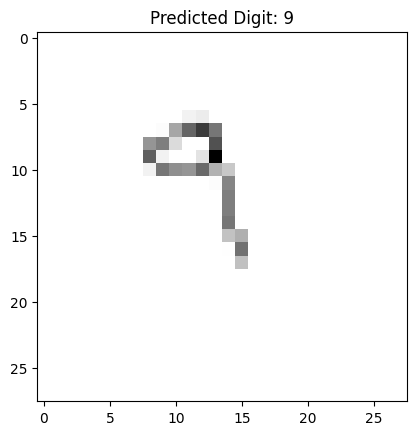

1/1 [==============================] - 0s 43ms/step


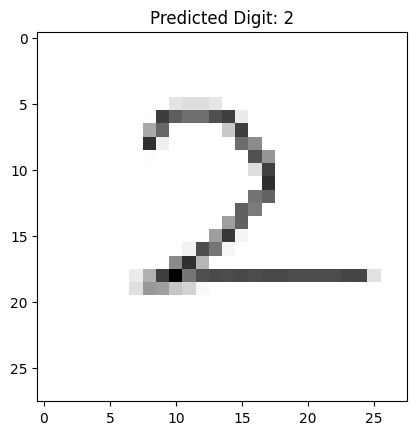

1/1 [==============================] - 0s 32ms/step


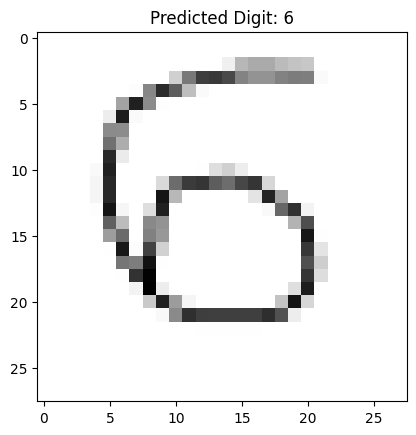

In [ ]:
img_no = 1
while os.path.isfile(f"digits/digit{img_no}.png"):
    # Load the image in grayscale
    img=cv2.imread(f"digits/digit{img_no}.png", cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(28,28),interpolation = cv2.INTER_AREA)
    img=np.invert(img)
    img=img / 255.0    
    img=np.expand_dims(img, axis=0)
    prediction=new_model.predict(img)
    predicted_digit=np.argmax(prediction)
    
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.show()
    
    img_no+=1